In [1]:
from kneed.data_generator import DataGenerator
from kneed.knee_locator import KneeLocator

In [58]:
DG = DataGenerator()
x, y = DG.noisy_gaussian(mu=50, sigma=10, N=10000)
kl = KneeLocator(x, y, S=1.0, invert=False)
print(kl.knee)

60.90411739649637


# kneed -- knee detection in Python

For the purposes of the walkthrough, import `DataGenerator` to create simulated datasets.  
In practice, the `KneeLocator` class will be used to identify the knee point.

In [1]:
%matplotlib inline

import sys
sys.path.append('..')

from kneed import DataGenerator
from kneed import KneeLocator

import numpy as np

In [2]:
np.random.seed(23) # only for the walkthrough

In [3]:
DG = DataGenerator()
x,y = DG.noisy_gaussian(N=1000)

In [4]:
x[:5],y[:5]

(array([ 24.14475503,  24.92443938,  24.93769683,  25.37559952,  25.45830214]),
 array([ 0.   ,  0.001,  0.002,  0.003,  0.004]))

The knee is located by passing `x` and `y` values to `knee_locator`.  
`S` is the sensitivity parameter  
`invert`=True when the graph has negative concavity.

In [5]:
kneedle = KneeLocator(x, y, S=1.0, invert=False)

In [6]:
kneedle.knee

60.763851270368505

In [7]:
kneedle.knee_x

880

There are plotting functions to visualize the knee point on the raw data and the normalized data.

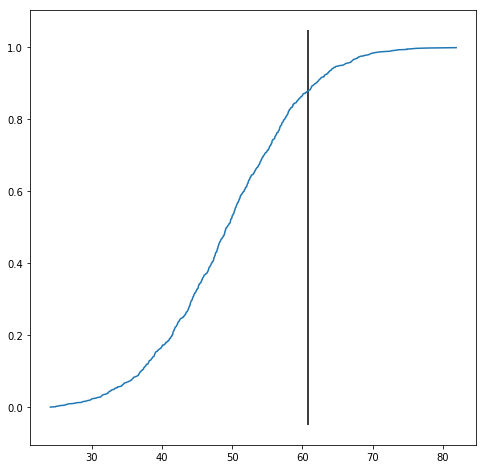

In [8]:
kneedle.plot_knee()

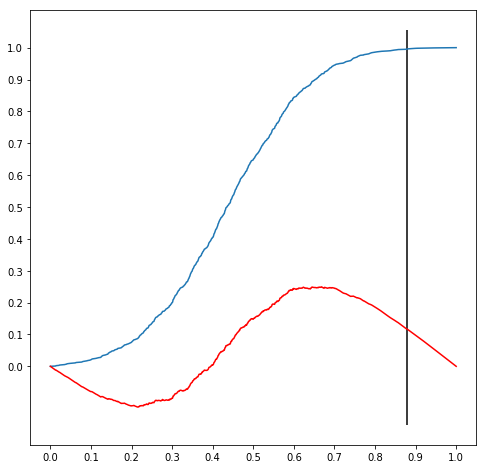

In [9]:
kneedle.plot_knee_normalized()

## Average Knee for NoisyGaussian from 5000 random iterations

In [10]:
knees = []
for i in range(5000):
    x,y = DG.noisy_gaussian(N=1000)
    kneedle = KneeLocator(x,y)
    knees.append(kneedle.knee)

In [11]:
np.mean(knees)

60.921051806064931